<a href="https://colab.research.google.com/github/crehana-studentxp/analisis_exploratorio_python-richard_rivas/blob/main/An%C3%A1lisis_Exploratorio_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis Exploratorio de Datos: Salarios en FAANG

Analizamos la relación entre salario base y años de experiencia

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Crehana/Análisis Exploratorio de Datos con Python y Pandas/Levels_Fyi_Salary_Data.csv')

df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,7392,807.0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7419,807.0,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,11527,819.0,3,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,7472,807.0,7,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7322,807.0,9,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['basesalary'] = df['basesalary'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                62642 non-null  datetime64[ns]
 1   company                  62637 non-null  object        
 2   level                    62523 non-null  object        
 3   title                    62642 non-null  object        
 4   totalyearlycompensation  62642 non-null  int64         
 5   location                 62642 non-null  object        
 6   yearsofexperience        62642 non-null  float64       
 7   yearsatcompany           62642 non-null  float64       
 8   tag                      61788 non-null  object        
 9   basesalary               62642 non-null  int64         
 10  stockgrantvalue          62642 non-null  float64       
 11  bonus                    62642 non-null  float64       
 12  gender                   43102 n

## Limpieza y Armado de Columnas

In [ ]:
df.drop(['rowNumber', 'dmaid', 'cityid', 'stockgrantvalue', 'timestamp'], axis = 1, inplace = True)

In [ ]:
df.head()

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,bonus,gender,otherdetails,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,10000.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,35000.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [ ]:
def faang_classifier(company):
  faang = ['Facebook', 'Amazon', 'Apple', 'Netflix', 'Google']
  if company in faang:
    return 1
  else:
    return 0

In [ ]:
df['is_faang'] = df['company'].apply(lambda x: faang_classifier(x))

df.head()

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,bonus,gender,otherdetails,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,is_faang
0,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,10000.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0
1,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0
2,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1
3,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,35000.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1
4,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0


## Valores Duplicados, Inexistentes y Outliers

In [ ]:
df.replace("", np.nan, inplace = True)

In [ ]:
df.isna().sum()

company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
bonus                          0
gender                     19540
otherdetails               22505
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
is_faang                       0
dtype: int64

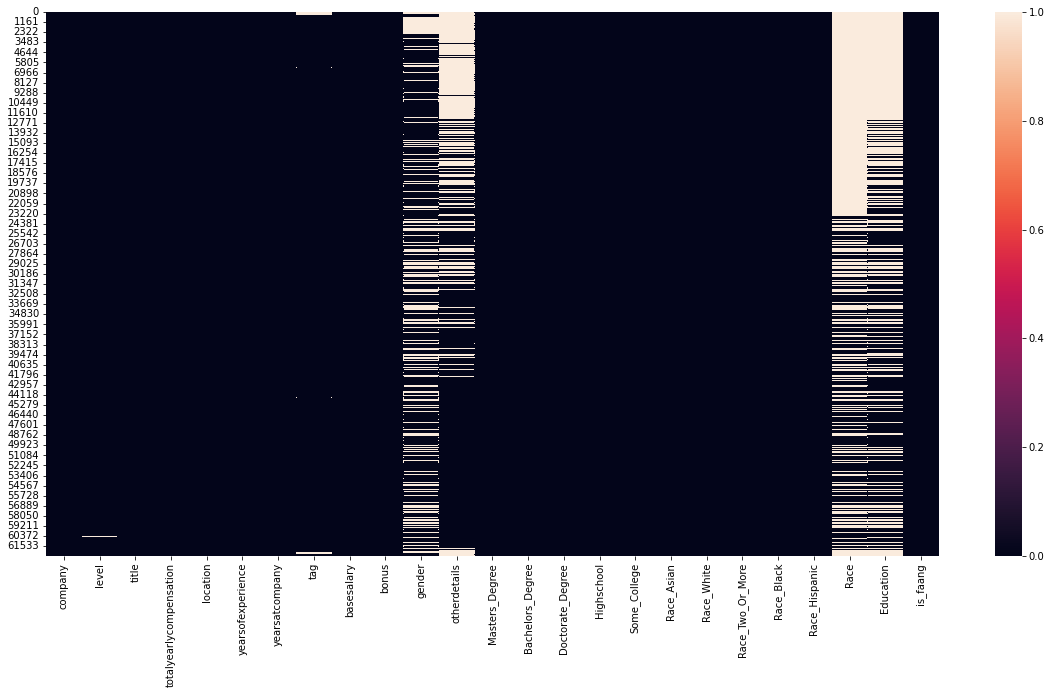

In [ ]:
plt.figure(figsize = (20,10))

sns.heatmap(df.isna())

plt.show()

In [ ]:
col_numericas = df.select_dtypes(['float64', 'int64'])

col_categoricas = df.select_dtypes(['object'])

In [ ]:
for col in col_numericas.columns:
  df[col].fillna(df[col].mean(), inplace = True)



In [ ]:
for col in col_categoricas.columns:
  df[col].fillna(df[col].mode().values[0], inplace = True)

In [ ]:
df.isna().sum()

company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
bonus                      0
gender                     0
otherdetails               0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
Race_Asian                 0
Race_White                 0
Race_Two_Or_More           0
Race_Black                 0
Race_Hispanic              0
Race                       0
Education                  0
is_faang                   0
dtype: int64

In [ ]:
df.duplicated().sum()

302

In [ ]:
df = df.drop_duplicates()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


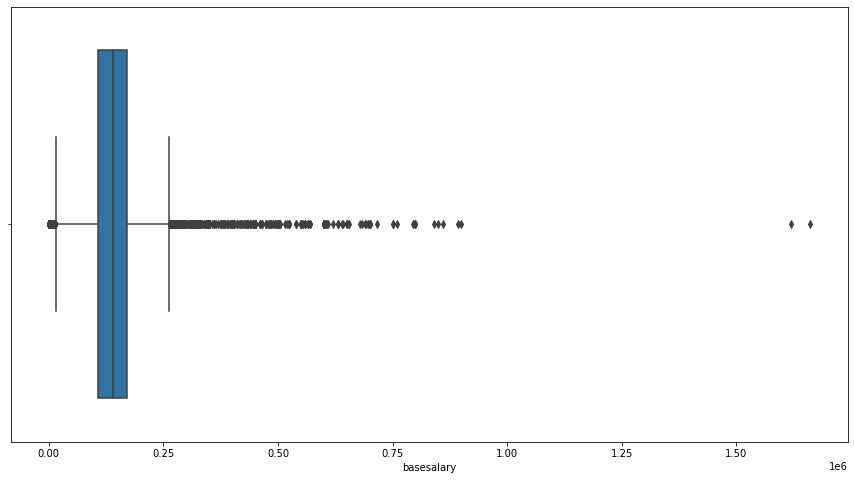

In [ ]:
plt.figure(figsize = (15, 8))

sns.boxplot(df.basesalary)

plt.show()

In [ ]:
from scipy.stats.mstats import winsorize

lim_inferior = 0.02
lim_superior = 0.02

In [ ]:
cols_to_winsorize = ['basesalary', 'yearsatcompany', 'yearsofexperience']

for col in cols_to_winsorize:
  df[col] = winsorize(df[col], limits = [lim_inferior, lim_superior])

In [ ]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,is_faang
count,6.234000e+04,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000
mean,2.163281e+05,7.136051,2.630751,135159.180382,19338.694189,0.246182,0.201861,0.028858,0.005133,0.005695,0.188450,0.128649,0.012865,0.011020,0.018094,0.282820
std,1.381433e+05,5.593899,2.927262,54702.034952,26800.859652,0.430789,0.401392,0.167408,0.071462,0.075248,0.391075,0.334814,0.112693,0.104398,0.133294,0.450373
min,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,108000.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,140000.000000,14000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,170000.000000,26000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4.980000e+06,22.000000,13.000000,250000.000000,1000000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Análisis Univariable

In [ ]:
df = df[df['is_faang'] == 1]

In [ ]:
df.sample(5)

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,bonus,gender,otherdetails,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,is_faang
32017,Facebook,IC5,Business Analyst,230000,"Menlo Park, CA",7.0,4.0,Analytic,170000,30000.0,Female,"Race: Asian, Academic Level: Bachelor’s degree",0,1,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree,1
45308,Apple,ICT5,Software Engineer,575000,"Cupertino, CA",20.0,5.0,Distributed Systems (Back-End),200000,35000.0,Male,"Title: Principal Software Engineer, Race: Asia...",1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree,1
34843,Apple,ICT3,Software Engineer,172000,"Herzliyya, TA, Israel",3.0,3.0,ECC,102000,10000.0,Male,"Title: Sw Engineer, Academic Level: Master’s d...",1,0,0,0,0,0,0,0,0,0,Asian,Master's Degree,1
1599,Amazon,L6,Product Manager,200000,"Seattle, WA",16.0,2.0,Web Development (Front-End),0,0.0,Male,Masters,0,0,0,0,0,0,0,0,0,0,Asian,Master's Degree,1
49126,Amazon,L4,Software Engineer,220000,"Palo Alto, CA",2.0,1.0,Distributed Systems (Back-End),145000,30000.0,Male,"Title: Software Development Engineer, Race: As...",1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree,1


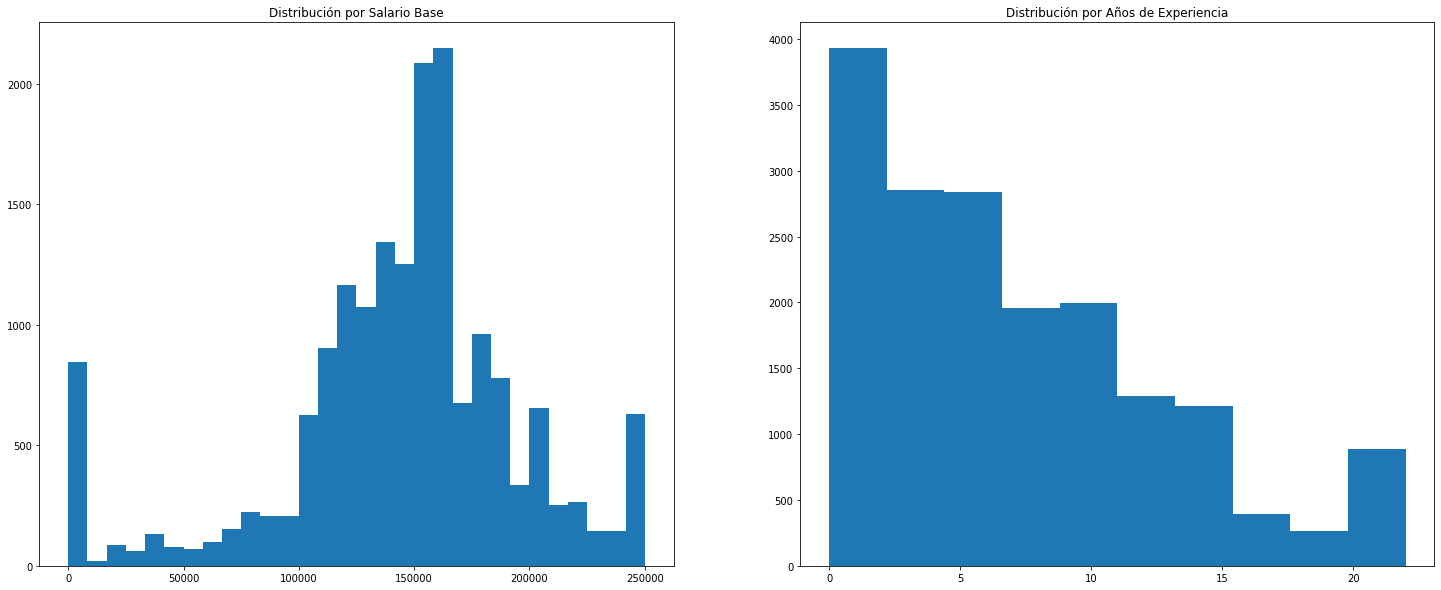

In [ ]:
plt.figure(figsize= (25,10))

plt.subplot(1,2,1)
plt.hist(x = df['basesalary'], bins = 30)
plt.title('Distribución por Salario Base')

plt.subplot(1,2,2)
plt.hist(x = df['yearsofexperience'], bins = 10)
plt.title('Distribución por Años de Experiencia')

plt.show()

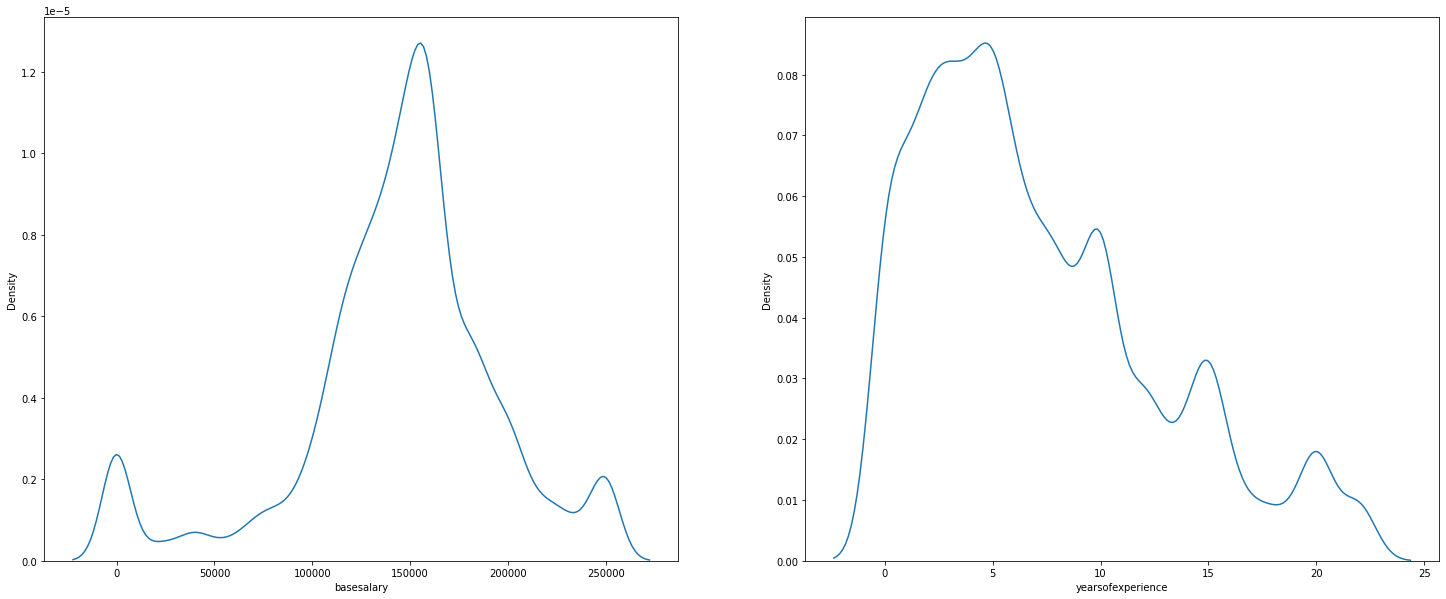

In [ ]:
plt.figure(figsize= (25,10))

plt.subplot(1,2,1)
sns.kdeplot(data = df, x = 'basesalary')

plt.subplot(1,2,2)
sns.kdeplot(data = df, x = 'yearsofexperience')

plt.show()

In [ ]:
cols_skew_curt = ['basesalary', 'yearsofexperience']

for i in cols_skew_curt:
  print(i, ':')
  print('Esta distribución tiene una asimetría de: ', df[i].skew())
  print('Esta distribución tiene una curtosis de: ', df[i].kurt())
  print('-------------------------------------')



basesalary :
Esta distribución tiene una asimetría de:  -0.7722729165891571
Esta distribución tiene una curtosis de:  1.3460661286879585
-------------------------------------
yearsofexperience :
Esta distribución tiene una asimetría de:  0.8244464957066859
Esta distribución tiene una curtosis de:  -0.058572296500536414
-------------------------------------


### Hallazgos sobre posiciones y compañías

* La mayor parte de los encuestados están en posiciones de Ingenieros de Software
* La segunda mayor concentración está ocupada por Product Managers
* Amazon contiene la mayor parte de los encuestados

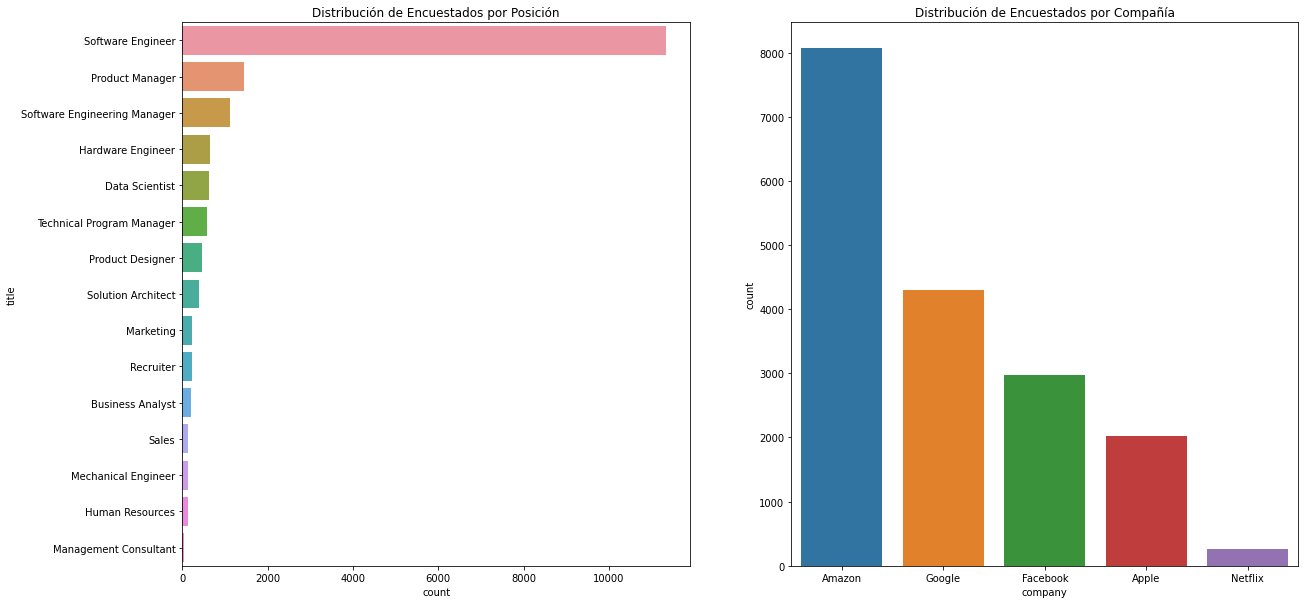

In [ ]:
plt.figure(figsize = (20, 10))

plt.subplot(1,2,1)
sns.countplot(data = df, y = 'title', order = df['title'].value_counts().index)
plt.title('Distribución de Encuestados por Posición')

plt.subplot(1,2,2)
sns.countplot(data = df, x = 'company', order = df['company'].value_counts().index)
plt.title('Distribución de Encuestados por Compañía')

plt.show()

## Análisis Multivariable

In [ ]:
df.corr()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,is_faang
totalyearlycompensation,1.000000,0.505560,0.316496,0.564444,0.418209,0.022206,-0.082902,0.097903,-0.010145,0.012303,-0.043455,0.018944,-0.004538,-0.015260,-0.031440,NaN
yearsofexperience,0.505560,1.000000,0.421088,0.350230,0.210733,0.053421,-0.058214,-0.011595,0.003775,0.033514,-0.062365,0.066464,-0.003121,-0.008161,-0.003114,NaN
yearsatcompany,0.316496,0.421088,1.000000,0.161512,-0.058416,-0.003674,-0.010417,0.003975,-0.011001,-0.004277,-0.012790,0.029405,-0.009327,-0.035978,-0.019515,NaN
basesalary,0.564444,0.350230,0.161512,1.000000,0.357533,0.112416,-0.031346,0.128746,0.001035,0.024629,0.009718,0.069095,0.013781,0.005623,-0.006218,NaN
bonus,0.418209,0.210733,-0.058416,0.357533,1.000000,0.031330,-0.028200,0.077814,-0.003788,0.009101,-0.002554,0.013662,0.018876,0.009041,0.002217,NaN
Masters_Degree,0.022206,0.053421,-0.003674,0.112416,0.031330,1.000000,-0.250626,-0.093022,-0.039420,-0.036770,0.306845,0.048339,0.026398,0.028403,0.011025,NaN
Bachelors_Degree,-0.082902,-0.058214,-0.010417,-0.031346,-0.028200,-0.250626,1.000000,-0.092885,-0.030844,-0.028770,0.262789,0.354188,0.106997,0.100231,0.151021,NaN
Doctorate_Degree,0.097903,-0.011595,0.003975,0.128746,0.077814,-0.093022,-0.092885,1.000000,-0.014589,-0.013608,0.048835,0.065070,0.004666,-0.004320,0.014172,NaN
Highschool,-0.010145,0.003775,-0.011001,0.001035,-0.003788,-0.039420,-0.030844,-0.014589,1.000000,-0.004519,-0.014557,0.097169,0.029262,0.025624,0.074144,NaN
Some_College,0.012303,0.033514,-0.004277,0.024629,0.009101,-0.036770,-0.028770,-0.013608,-0.004519,1.000000,-0.011178,0.115878,0.040370,0.019680,0.010201,NaN


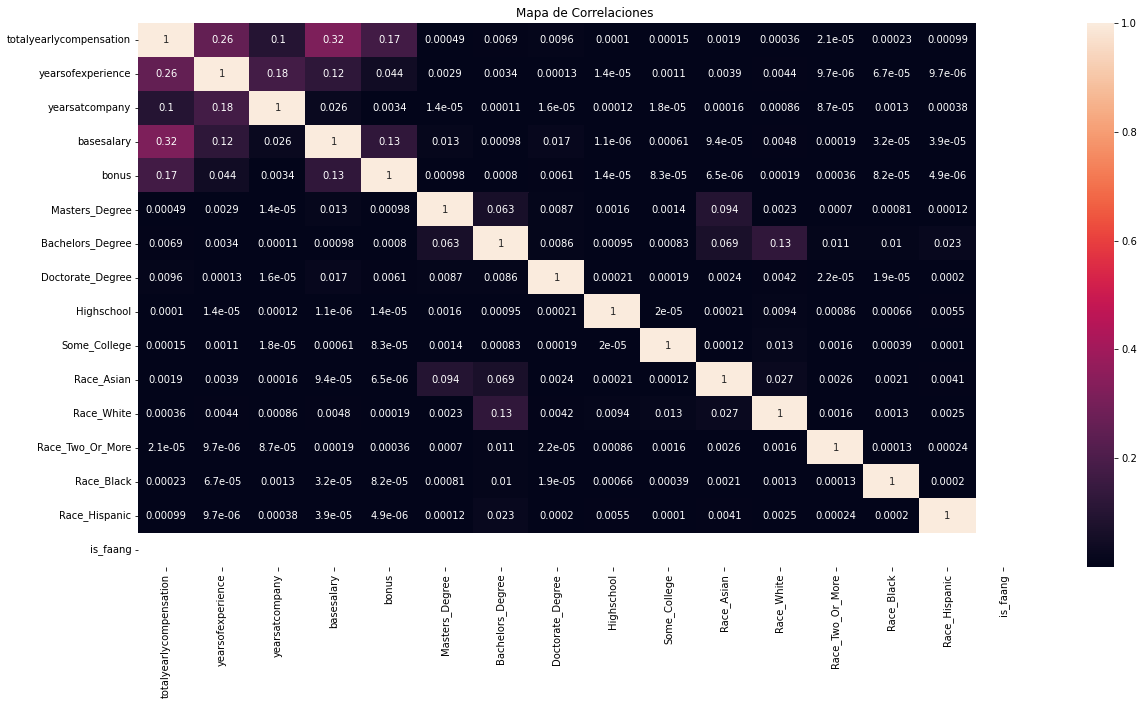

In [ ]:
plt.figure(figsize = (20,10))

sns.heatmap(df.corr() ** 2, annot = True)
plt.title('Mapa de Correlaciones')

plt.show()

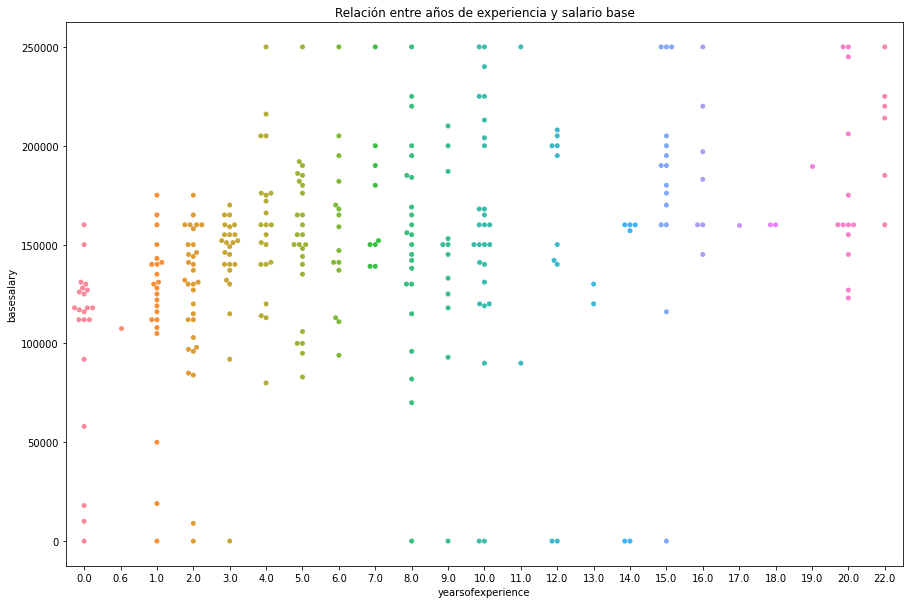

In [ ]:
plt.figure(figsize = (15,10))

sns.swarmplot(data = df.sample(300), x = 'yearsofexperience', y = 'basesalary')
plt.title('Relación entre años de experiencia y salario base')

plt.show()

Text(0.5, 1.0, 'Distribución de Salarios por Compañía')

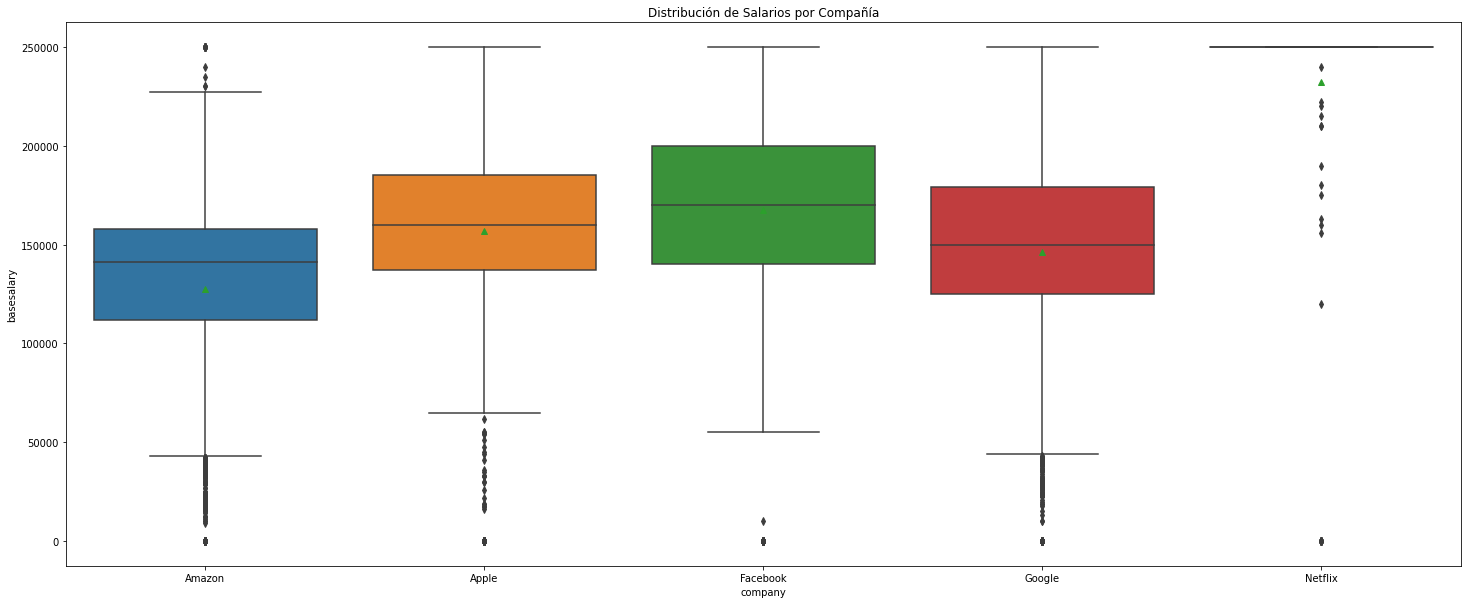

In [ ]:
plt.figure(figsize = (25,10))

sns.boxplot(data = df, x = 'company', y = 'basesalary', showmeans = True)
plt.title('Distribución de Salarios por Compañía')

## Análisis Cualitativo

In [ ]:
from wordcloud import WordCloud

In [ ]:
tag_words = ""
stop_words = {'nan', 'title'}

for i in df.tag:
  i = str(i)
  separate = i.split()
  for j in range(len(separate)):
    separate[j] = separate[j].lower()

  tag_words += " ".join(separate)+ " "


In [ ]:
tag_words

"full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stack full stac

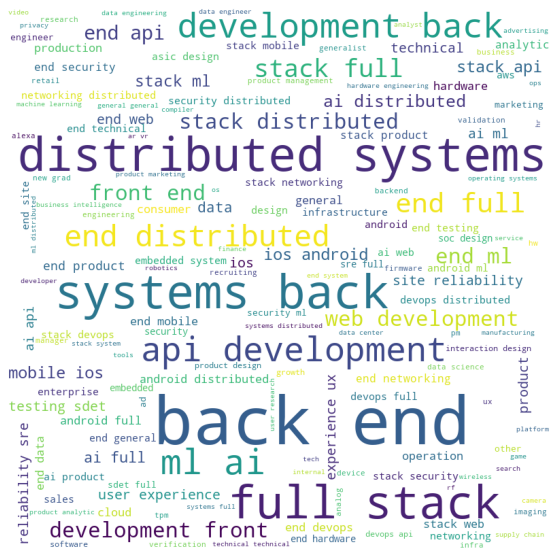

In [ ]:
wordcloud_1 = WordCloud(width = 800, height = 800,
                        background_color = 'white',
                        stopwords = stop_words,
                        min_font_size = 10).generate(tag_words)

plt.figure(figsize = (10,10))
plt.imshow(wordcloud_1)
plt.axis('off')

plt.show()